In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/car_evaluation.csv")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
df['class'].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


In [11]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [12]:
X = df.drop("class", axis = 1)
y = df["class"]

In [17]:
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,high,2,2,small,low
900,med,vhigh,3,4,small,med
1708,low,low,5more,2,big,high
705,high,med,4,2,med,med
678,high,med,3,2,med,med


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
  if X[col].dtype == 'object':
    X[col] = le.fit_transform(X[col])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1381, 6), (1381,), (346, 6), (346,))

In [20]:
X_train.dtypes

,0
buying,int64
maint,int64
doors,int64
persons,int64
lug_boot,int64
safety,int64


In [21]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,3,0,0,0,2,1
900,2,3,1,1,2,2
1708,1,1,3,0,0,0
705,0,2,2,0,1,2
678,0,2,1,0,1,2


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9335


In [31]:
rf_100 = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_100.fit(X_train, y_train)

y_pred_100 = rf_100.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9595


In [35]:
rf_1000 = RandomForestClassifier(n_estimators = 1000, random_state = 0)
rf_1000.fit(X_train, y_train)

y_pred_1000 = rf_1000.predict(X_test)

print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_1000)))

Model accuracy score with 1000 decision-trees : 0.9682


In [36]:
clf = RandomForestClassifier(n_estimators =100, random_state = 0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [38]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
safety,0.281243
persons,0.227353
buying,0.204051
maint,0.139813
lug_boot,0.082070
doors,0.065471


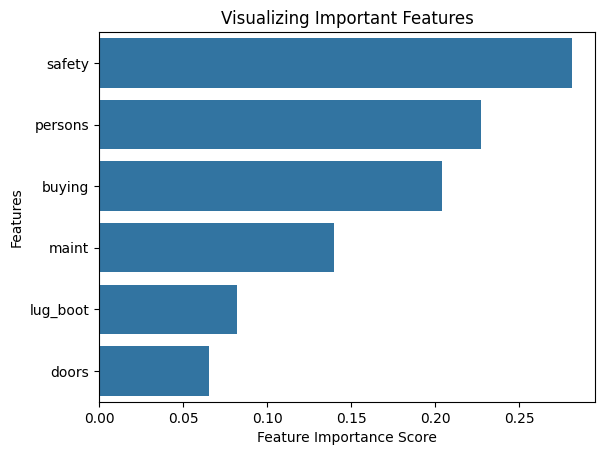

In [39]:
sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 70   0   6   1]
 [  2   9   0   4]
 [  5   0 232   0]
 [  5   0   0  12]]


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.85      0.91      0.88        77
        good       1.00      0.60      0.75        15
       unacc       0.97      0.98      0.98       237
       vgood       0.71      0.71      0.71        17

    accuracy                           0.93       346
   macro avg       0.88      0.80      0.83       346
weighted avg       0.94      0.93      0.93       346

